### Note for question2 
- Please follow the template to complete q2
- You may create new cells to report your results and observations

In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

## P1. Create data and plot
### TODO
- implement the true function $f(x)$ defined in the write-up 
- use function name **model()**
- sample 30 random points with noise
- plot sampled points together with the model function

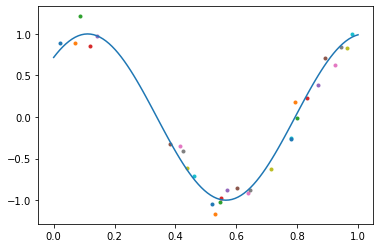

In [2]:
# Define the function to generate data points
def fx(X):
    s = np.random.normal(mu, sigma, 30)
    Y = np.sin((2.2*np.pi*X) + 0.8) + s
    return Y

# Initialize random seed
np.random.seed(0)

# Generate noisy data points: (x,y)
mu, sigma = 0, 0.1 # mean and standard deviation


# Plot true model and sampled data points
X = np.sort(np.random.rand(1,30))

Y = fx(X) 
plt.plot(X,Y,'.')

x = np.linspace(0,1,100)
y = np.sin((2.2*np.pi*x) + 0.8)
plt.plot(x,y)

plt.show()


## P2. Fit a linear model
### TODO
- use sklearn to fit model: $h(x) = w_0 + w_1x$
- report $w=[w_0,w_1]$
- plot the fitted model $h(x)$ together with data points

The weights are:  [ 0.06038094 -0.19787027]


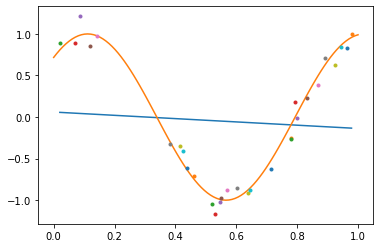

In [3]:
# Fit a linear model in the original space

reg = LinearRegression()
reg.fit(X.T, Y.T)
y_pred = reg.predict(X.T)

a = reg.coef_[0]
print("The weights are: ", np.concatenate((reg.intercept_, a)))
plt.plot(X.T,y_pred.reshape(-1,))
plt.plot(x,y)
plt.plot(X,Y,'.')
plt.show()


## P3. Fit a polynomial curve
### TODO
- augment the original feature to $[x, x^2, \cdots, x^{15}]$
- fit the polynomial curve: $h(x) = \sum_{i=0}^{15} w_i x^{i}$
- report $w=[w_0,w_1, \cdots, w_{15}]$
- plot the fitted model $h(x)$ together with data points

In [4]:
# Augment the original feature to a 15-vector
pow = np.arange(1,16).reshape(1,15)
X = np.power(X.T,pow)
print(X.shape)

(30, 15)


The weights are:  [ 3.11668326e+01 -2.97811464e+03  1.03893372e+05 -1.87420052e+06
  2.03716883e+07 -1.44873384e+08  7.09316488e+08 -2.47066318e+09
  6.24562579e+09 -1.15676829e+10  1.56895418e+10 -1.54006544e+10
  1.06457654e+10 -4.91379467e+09  1.35920218e+09 -1.70381549e+08]


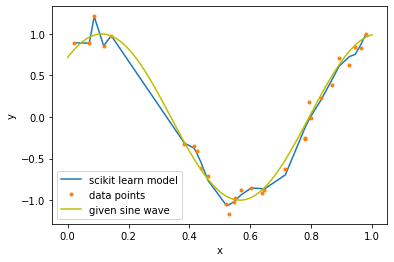

In [5]:
# Fit linear model to the generated 15-vector features
reg = LinearRegression()
reg.fit(X, Y.T)
y_pred = reg.predict(X)

a = reg.coef_[0]
print("The weights are: ", np.concatenate((reg.intercept_, a)))

# Plot fitted curve and sampled data points
plt.plot(X[:,0],y_pred.reshape(-1,),label = 'scikit learn model')
plt.plot(X[:,0],Y.reshape(-1,),'.',label='data points')
plt.plot(x,y,'y',label='given sine wave')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## P4. Lasso regularization
### TODO
- use sklearn to fit a 15-degree polynomial model with L1 regularization
- report $w$
- plot the fitted model $h(x)$ together with data points

The optimal weights are:  [  0.81569032   4.17233111 -23.11690837  -0.          33.54358736
   0.          -0.          -3.1172988  -15.41423917  -0.
  -0.          -0.          -0.           0.           0.
   4.27750406]
Optimal hyper-parameter:  1e-06


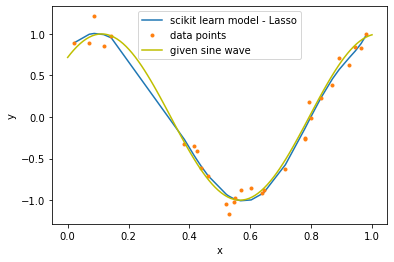

In [6]:
# Fit 15-degree polynomial with L1 regularization 
# Start with lambda(alpha) = 0.01 and max_iter = 1e4

# Plot fitted curve and sampled data points
clf = linear_model.Lasso(alpha=0.000001, max_iter=10000000)
clf.fit(X,Y.T)
y_pred = clf.predict(X)
alpha = 0.000001
print("The optimal weights are: ", np.concatenate((clf.intercept_, clf.coef_)))
print("Optimal hyper-parameter: ",alpha)
# cost = (1 / (2 * Y.shape[1])) * np.sum(np.square(Y.T - clf.intercept_ - np.matmul(X,clf.coef_.reshape(-1,1))),axis=0) + (alpha*(np.sum(np.absolute(np.concatenate(clf.coef_,clf.intercept_)))))
#print(cost)

# Plot fitted curve and sampled data points
plt.plot(X[:,0],y_pred, label = 'scikit learn model - Lasso')
plt.plot(X[:,0],Y.reshape(-1,),'.', label='data points')
plt.plot(x,y,'y',label='given sine wave')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Effect of hyper-parameter:

As the value of the hyper-parameter decreases, the curve fits better to the data points. It moves from the underfit domain to properly fitting the curve without generating bias. Reducing the value of the lamba results in an increase in the number of non-zero features, which result in a good-fitted model. After a particular value of lambda. The optimal weights are displayed above for the value of lamba = 0.000001 

Lasso Regularization:

Lasso regularization is used to reduce overfitting of the classification model. This is done by multiplying a hyper-parameter "lambda" with the asolute vaule of the wieghts for computing the cost function. Since our goal is to minimize the cost function, the hyper-parameter penalizes the weight that contributes the most. Lasso regularization also helps in feature selcetion since it reduces the weights to zero for some of the parameters.

## P5. Ridge regularization
### TODO
- use sklearn to fit a 15-degree polynomial model with L2 regularization
- report $w$
- plot the fitted model $h(x)$ together with data points

The optimal weights are:  [  0.83593839   3.91022111 -23.7262945    8.05319555  16.38803609
   9.95916322   1.04272685  -4.80492616  -6.74385508  -5.91937892
  -3.80622361  -1.51220754   0.36782484   1.66131649   2.46558084
   3.01112139]
Optimal hyper-parameter:  1e-06


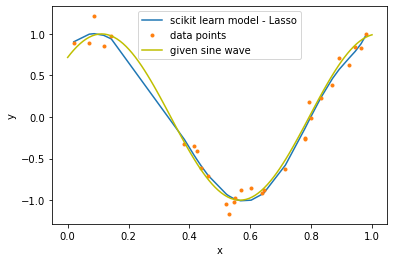

In [7]:
# Fit 15-degree polynomial with L2 regularization
# Start with lambda(alpha) = 0.01 and max_iter = 1e4

# Plot fitted curve and sampled data points and compare to L1 regularization from P4

rid = Ridge(alpha=0.00001,max_iter = 10000)
rid.fit(X, Y.T)
y_pred = rid.predict(X)
a = rid.coef_[0]

print("The optimal weights are: ", np.concatenate((rid.intercept_, a)))
print("Optimal hyper-parameter: ",alpha)
# Plot fitted curve and sampled data points
plt.plot(X[:,0],y_pred, label = 'scikit learn model - Lasso')
plt.plot(X[:,0],Y.reshape(-1,),'.', label='data points')
plt.plot(x,y,'y',label='given sine wave')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()